In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
predicted_labels_df = pd.read_csv("./sst_dataset/SST2-Data/SST2-Data/stanfordSentimentTreebank/stanfordSentimentTreebank/predicted_sentiment_labels.txt", sep='\t', index_col=0)
predicted_labels_few_shot_df = pd.read_csv("./sst_dataset/SST2-Data/SST2-Data/stanfordSentimentTreebank/stanfordSentimentTreebank/predicted_sentiment_labels_few_shot.txt", sep='\t', index_col=0)
original_labels_df = pd.read_csv("./sst_dataset/SST2-Data/SST2-Data/stanfordSentimentTreebank/stanfordSentimentTreebank/sentiment_labels_test.txt", sep='\t', index_col=0)

In [3]:
# #predicted_labels_df['classified_sentiment'] = pd.to_numeric(predicted_labels_df['classified_sentiment'], downcast='integer', errors='coerce')
# #predicted_labels_few_shot_df['classified_sentiment'] = pd.to_numeric(predicted_labels_few_shot_df['classified_sentiment'], downcast='integer', errors='coerce')

# # For three class classification:
# mapping = {0: 0, 1: 0, 2: 1, 3: 2, 4: 2}
# # Apply the mapping
# predicted_labels_df['classified_sentiment'] = predicted_labels_df['classified_sentiment'].replace(mapping)
# predicted_labels_few_shot_df['classified_sentiment'] = predicted_labels_few_shot_df['classified_sentiment'].replace(mapping)
# original_labels_df['sentiment_labels'] = original_labels_df['sentiment_labels'].replace(mapping)

In [4]:
# Create a mask to exclute NaN values from mean calculation
mask = predicted_labels_df['classified_sentiment'].notna()
mask_few_shot = predicted_labels_few_shot_df['classified_sentiment'].notna()

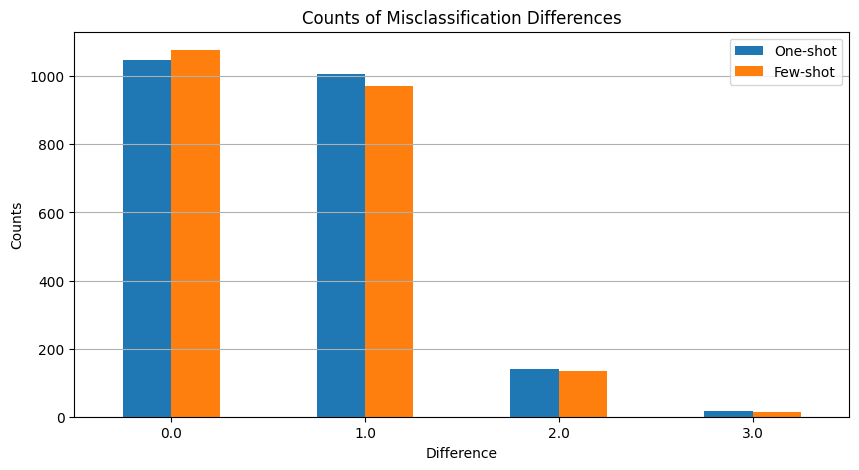

In [5]:
# Calculating differences
diff = np.abs(original_labels_df['sentiment_labels'][mask] - predicted_labels_df['classified_sentiment'][mask])
diff_counts = diff.value_counts()

diff_few_shot = np.abs(original_labels_df['sentiment_labels'][mask_few_shot] - predicted_labels_few_shot_df['classified_sentiment'][mask_few_shot])
diff_counts_few_shot = diff_few_shot.value_counts()

# Merging and sorting the counts
combined_diff_counts = pd.DataFrame({'One-shot': diff_counts, 'Few-shot': diff_counts_few_shot}).fillna(0)
combined_diff_counts.sort_index(inplace=True)

# Plotting
plt.figure(figsize=(10, 5))
combined_diff_counts.plot(kind='bar', ax=plt.gca())
plt.title('Counts of Misclassification Differences')
plt.xlabel('Difference')
plt.ylabel('Counts')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend()
plt.show()

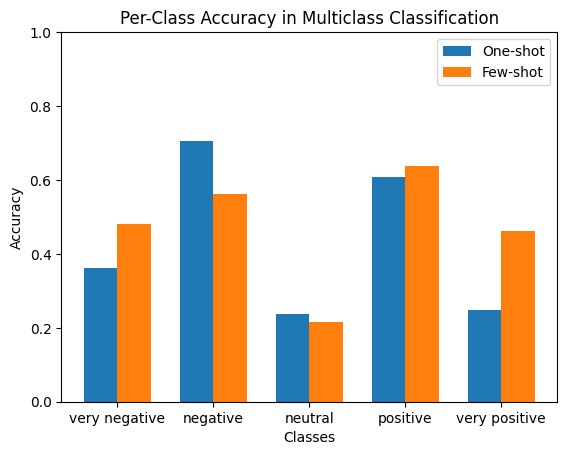

In [6]:
labels = ['very negative', 'negative', 'neutral', 'positive', 'very positive']
#labels = ['negative', 'neutral', 'positive']

# Calculating per-class accuracy for regular classification
y_pred = predicted_labels_df['classified_sentiment'][mask].values
y_true = original_labels_df['sentiment_labels'][mask].values
classes = np.unique(np.concatenate((y_pred, y_true)))
cm = confusion_matrix(y_true, y_pred, labels=classes)
class_accuracy_regular = cm.diagonal() / cm.sum(axis=1)

# Calculating per-class accuracy for few-shot classification
y_pred_few_shot = predicted_labels_few_shot_df['classified_sentiment'][mask_few_shot].values
y_true_few_shot = original_labels_df['sentiment_labels'][mask_few_shot].values
cm_few_shot = confusion_matrix(y_true_few_shot, y_pred_few_shot, labels=classes)
class_accuracy_few_shot = cm_few_shot.diagonal() / cm_few_shot.sum(axis=1)

# Width of the bars in the bar plot
bar_width = 0.35

# Plotting
fig, ax = plt.subplots()
index = np.arange(len(classes))

bar1 = ax.bar(index, class_accuracy_regular, bar_width, label='One-shot')
bar2 = ax.bar(index + bar_width, class_accuracy_few_shot, bar_width, label='Few-shot')

ax.set_xlabel('Classes')
ax.set_ylabel('Accuracy')
ax.set_title('Per-Class Accuracy in Multiclass Classification')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1)  # Set y-axis limit to range from 0 to 1
ax.legend()

plt.show()

In [7]:
# Classification report for regular classification
report_regular = classification_report(y_true, y_pred, target_names=labels)
print("One-shot Classification Report:\n", report_regular)

# Classification report for few-shot classification
report_few_shot = classification_report(y_true_few_shot, y_pred_few_shot, target_names=labels)
print("Few-shot Classification Report:\n", report_few_shot)

One-shot Classification Report:
                precision    recall  f1-score   support

very negative       0.40      0.36      0.38       279
     negative       0.52      0.71      0.60       633
      neutral       0.37      0.24      0.29       389
     positive       0.45      0.61      0.52       509
very positive       0.66      0.25      0.36       399

     accuracy                           0.47      2209
    macro avg       0.48      0.43      0.43      2209
 weighted avg       0.48      0.47      0.45      2209

Few-shot Classification Report:
                precision    recall  f1-score   support

very negative       0.41      0.48      0.44       277
     negative       0.58      0.56      0.57       625
      neutral       0.38      0.22      0.27       386
     positive       0.45      0.64      0.53       509
very positive       0.57      0.46      0.51       398

     accuracy                           0.49      2195
    macro avg       0.48      0.47      0.47     